# Sample plots in Matplotlib

In [8]:
import numpy as np 

import matplotlib.pyplot as plt   # plot

## Line Plot

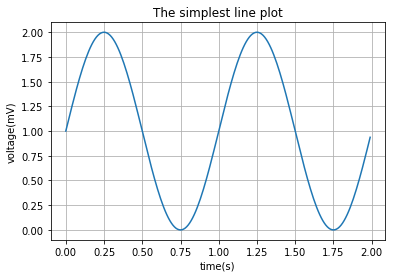

In [3]:
t = np.arange(0.0,2.0,0.01)
s = 1 + np.sin(2*np.pi*t)

# equivalent to: 
# fig = plt.figure()
# ax = fig.add_subplot(111)
fig,ax = plt.subplots()

ax.plot(t,s)

ax.set(xlabel='time(s)', ylabel='voltage(mV)', 
      title='The simplest line plot')
ax.grid()

plt.show()

## Multiple subplots

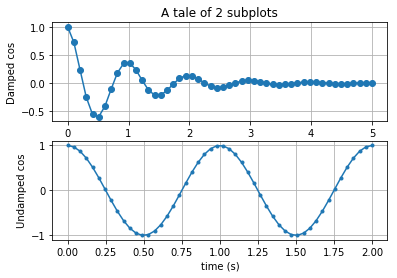

In [7]:
x1 = np.linspace(0.0,5.0) #default num=50
x2 = np.linspace(0.0,2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2) 

plt.subplot(2,1,1)
plt.plot(x1,y1,'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped cos')
plt.grid()

plt.subplot(2,1,2)
plt.plot(x2,y2,'.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped cos')
plt.grid()

plt.show()

## Image Demo

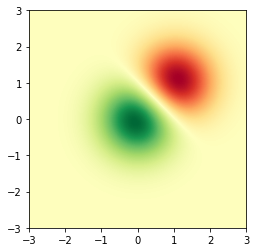

In [42]:
import matplotlib.cm as cm  # color map 

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta) 
X,Y = np.meshgrid(x,y)

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X-1)**2 - (Y-1)**2)
Z = (Z1-Z2)*2

im = plt.imshow(Z, 
               interpolation='bilinear',cmap=cm.RdYlGn,
               origin='lower', extent=[-3,3,-3,3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())
plt.show()

x,y size= (81, 81)
z size= (80, 80)
levels (16,) z.min= -0.999883492983 z.max= 1.050769511
[-1.05 -0.9  -0.75 -0.6  -0.45 -0.3  -0.15  0.    0.15  0.3   0.45  0.6
  0.75  0.9   1.05  1.2 ]
colar map steps=  256


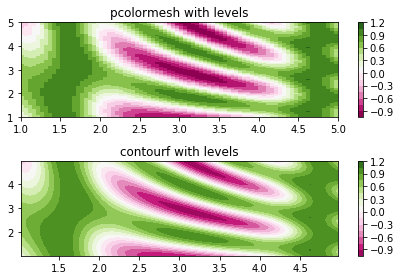

In [40]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

# x,y value step 
dx,dy = 0.05, 0.05

# generate two 2D grids for the X & bounds 
y,x = np.mgrid[slice(1,5+dy,dy), slice(1,5+dx,dx)]
print('x,y size=', x.shape)

# data to plot 
z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds 
z = z[:-1,:-1] #remove one row/col
print('z size=', z.shape)

levels = MaxNLocator(nbins=15).tick_values(z.min(),z.max())
print('levels', levels.shape, 'z.min=', z.min(), 'z.max=',z.max())
print(levels)

# pick the designed colormap
cmap = plt.get_cmap('PiYG')
print('colar map steps= ', cmap.N)

# Define a normalization instance ...
# which takes data values and translates to those into levels
# The number of colors used is set to 'nbins=15'. Boundary is 16 levels. 
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
print(norm) # object definining colormap ndex based on discrete intervals 

fig, (ax0,ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x,y,z,cmap=cmap,norm=norm)
fig.colorbar(im,ax=ax0)
ax0.set_title('pcolormesh with levels')

# contours are *point* based on plots, so convert our bound into point centers. 
cf = ax1.contourf( x[:-1,:-1] + dx/2, y[:-1,:-1] + dy/2, z, 
                   levels=levels, cmap=cmap)
fig.colorbar(cf,ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so 'ax1' title and 'ax0' title tick labels do not overwrap
fig.tight_layout()

plt.show()
